In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
import csv
random.seed(100)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
#import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [ ]:
def model_evaluation(model,x,y):
  pre=cross_val_predict(model, x, y, cv=10)
  acc = metrics.accuracy_score(y, pre)
  print("test accuracy = " + str(acc))
  classReport=classification_report(y, pre)
  print(classReport)
  cm=confusion_matrix(y, pre)
  print(cm)
  #proba = cross_val_predict(model, x, y, cv=10, method='predict_proba')
  fpr, tpr, _ = roc_curve(y,proba[:,0], pos_label='Cancer')
  roc_auc= auc(fpr, tpr)
  return acc,fpr,tpr,roc_auc



In [ ]:
pip install javabridge

In [ ]:
pip install weka

In [ ]:
pip install python-weka-wrapper3

Classifiers in pythonwekawrapper package:

In [ ]:
import os
import sys
sys.path
sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"
!apt-get install build-essential python3-dev
!apt-get install python3-pil python3-pygraphviz
!apt install openjdk-11-jdk
!pip3 install javabridge --no-cache-dir
!pip3 install python-weka-wrapper3 --no-cache-dir
!pip3 install weka

import weka.core.jvm as jvm
#jvm.start()
#jvm.stop()
jvm.start(packages=True)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pil is already the newest version (5.1.0-1ubuntu0.6).
python3-pygraphviz is already the newest version (1.4~rc1-1build2.1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.11+9-0ubuntu2~18.04).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.7/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.7/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.7/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [ ]:
import sys
import weka.core.jvm as jvm
import weka.core.packages as packages
from weka.core.classes import complete_classname
jvm.start(packages=True)
pkg = "DTNB"

# install package if necessary
if not packages.is_installed(pkg):
    print("Installing %s..." % pkg)
    packages.install_package(pkg)
    print("Installed %s, please re-run script!" % pkg)
    jvm.stop()
    sys.exit(0)

# testing classname completion
print(complete_classname(".J48"))
print(complete_classname(".DTNB"))

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


weka.classifiers.trees.J48
weka.classifiers.rules.DTNB


In [ ]:
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# classifiers.py
# Copyright (C) 2014-2019 Fracpete (pythonwekawrapper at gmail dot com)

import javabridge
import logging
import weka.plot as plot
if plot.matplotlib_available:
      import matplotlib.pyplot as plt
from weka.core.classes import JavaObject, join_options
from weka.core.dataset import Instances
from weka.classifiers import Classifier, Evaluation, NumericPrediction, NominalPrediction

# logging setup
logger = logging.getLogger(__name__)


def plot_classifier_errors(predictions, absolute=True, max_relative_size=50, absolute_size=50, title=None,
                           outfile=None, wait=True, key_loc="lower center"):
    """
    Plots the classifers for the given list of predictions.
    TODO: click events http://matplotlib.org/examples/event_handling/data_browser.html
    :param predictions: the predictions to plot, use a dict to plot predictions of multiple classifiers
                        (keys are used as prefixes for plots)
    :type predictions: list or dict
    :param absolute: whether to use absolute errors as size or relative ones
    :type absolute: bool
    :param max_relative_size: the maximum size in point in case of relative mode
    :type max_relative_size: int
    :param absolute_size: the size in point in case of absolute mode
    :type absolute_size: int
    :param title: an optional title
    :type title: str
    :param outfile: the output file, ignored if None
    :type outfile: str
    :param wait: whether to wait for the user to close the plot
    :type wait: bool
    :param key_loc: the location string for the key
    :type key_loc: str
    """
    if not plot.matplotlib_available:
        logger.error("Matplotlib is not installed, plotting unavailable!")
        return

    if isinstance(predictions, list):
        multiple = {"": predictions}
    else:
        multiple = predictions

    actual = []
    predicted = []
    error = None
    cls = None
    ax = None
    for prefix in multiple:
        predictions = multiple[prefix]
        if prefix == "":
            prefix = None
        for pred in predictions:
            actual.append(pred.actual)
            predicted.append(pred.predicted)
            if isinstance(pred, NumericPrediction):
                if error is None:
                    error = []
                error.append(abs(pred.error))
            elif isinstance(pred, NominalPrediction):
                if cls is None:
                    cls = []
                if pred.actual != pred.predicted:
                    cls.append(1)
                else:
                    cls.append(0)
        if ax is None:
            fig, ax = plt.subplots()
            ax.set_xlabel("actual")
            ax.set_ylabel("predicted")
            if title is None:
                title = "Classifier errors"
            ax.set_title(title)
            ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="0.3")
            ax.grid(True)
            fig.canvas.set_window_title(title)
        if error is None and cls is None:
            ax.scatter(actual, predicted, s=absolute_size, alpha=0.5, label=prefix)
        elif cls is not None:
            ax.scatter(actual, predicted, c=cls, s=absolute_size, alpha=0.5, label=prefix)
        elif error is not None:
            if not absolute:
                min_err = min(error)
                max_err = max(error)
                factor = (max_err - min_err) / max_relative_size
                for i in range(len(error)):
                    error[i] = error[i] / factor * max_relative_size
            ax.scatter(actual, predicted, s=error, alpha=0.5, label=prefix)
    plt.draw()
    if len(multiple) > 1:
        plt.legend(loc=key_loc, shadow=True)
    if outfile is not None:
        plt.savefig(outfile)
    if wait:
        plt.show()


def generate_thresholdcurve_data(evaluation, class_index):
    """
    Generates the threshold curve data from the evaluation object's predictions.
    :param evaluation: the evaluation to obtain the predictions from
    :type evaluation: Evaluation
    :param class_index: the 0-based index of the class-label to create the plot for
    :type class_index: int
    :return: the generated threshold curve data
    :rtype: Instances
    """
    jtc = JavaObject.new_instance("weka.classifiers.evaluation.ThresholdCurve")
    pred = javabridge.call(evaluation.jobject, "predictions", "()Ljava/util/ArrayList;")
    result = Instances(
        javabridge.call(jtc, "getCurve", "(Ljava/util/ArrayList;I)Lweka/core/Instances;", pred, class_index))
    return result


def get_thresholdcurve_data(data, xname, yname):
    """
    Retrieves x and y columns from  of the data generated by the weka.classifiers.evaluation.ThresholdCurve
    class.
    :param data: the threshold curve data
    :type data: Instances
    :param xname: the name of the X column
    :type xname: str
    :param yname: the name of the Y column
    :type yname: str
    :return: tuple of x and y arrays
    :rtype: tuple
    """
    xi = data.attribute_by_name(xname).index
    yi = data.attribute_by_name(yname).index
    x = []
    y = []
    for i in xrange(data.num_instances):
        inst = data.get_instance(i)
        x.append(inst.get_value(xi))
        y.append(inst.get_value(yi))
    return x, y


def get_auc(data):
    """
    Calculates the area under the ROC curve (AUC).
    :param data: the threshold curve data
    :type data: Instances
    :return: the area
    :rtype: float
    """
    return javabridge.static_call(
        "weka/classifiers/evaluation/ThresholdCurve", "getROCArea", "(Lweka/core/Instances;)D", data.jobject)


def get_prc(data):
    """
    Calculates the area under the precision recall curve (PRC).
    :param data: the threshold curve data
    :type data: Instances
    :return: the area
    :rtype: float
    """
    return javabridge.static_call(
        "weka/classifiers/evaluation/ThresholdCurve", "getPRCArea", "(Lweka/core/Instances;)D", data.jobject)


def plot_roc(evaluation, class_index=None, title=None, key_loc="lower right", outfile=None, wait=True):
    """
    Plots the ROC (receiver operator characteristics) curve for the given predictions.
    TODO: click events http://matplotlib.org/examples/event_handling/data_browser.html
    :param evaluation: the evaluation to obtain the predictions from
    :type evaluation: Evaluation
    :param class_index: the list of 0-based indices of the class-labels to create the plot for
    :type class_index: list
    :param title: an optional title
    :type title: str
    :param key_loc: the position string for the key
    :type key_loc: str
    :param outfile: the output file, ignored if None
    :type outfile: str
    :param wait: whether to wait for the user to close the plot
    :type wait: bool
    """
    if not plot.matplotlib_available:
        logger.error("Matplotlib is not installed, plotting unavailable!")
        return
    if class_index is None:
        class_index = [0]
    ax = None
    for cindex in class_index:
        data = generate_thresholdcurve_data(evaluation, cindex)
        head = evaluation.header
        area = get_auc(data)
        x, y = get_thresholdcurve_data(data, "False Positive Rate", "True Positive Rate")
        if ax is None:
            fig, ax = plt.subplots()
            ax.set_xlabel("False Positive Rate")
            ax.set_ylabel("True Positive Rate")
            if title is None:
                title = "ROC"
            ax.set_title(title)
            ax.grid(True)
            fig.canvas.set_window_title(title)
            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
        plot_label = head.class_attribute.value(cindex) + " (AUC: %0.4f)" % area
        ax.plot(x, y, label=plot_label)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="0.3")
    plt.draw()
    plt.legend(loc=key_loc, shadow=True)
    if outfile is not None:
        plt.savefig(outfile)
    if wait:
        plt.show()


def plot_rocs(evaluations, class_index=0, title=None, key_loc="lower right", outfile=None, wait=True):
    """
    Plots the ROC (receiver operator characteristics) curve for the predictions of multiple classifiers
    on the same dataset.
    TODO: click events http://matplotlib.org/examples/event_handling/data_browser.html
    :param evaluations: the dictionary of Evaluation objects to obtain the predictions from, the key is used
                        in the plot key as prefix
    :type evaluations: dict
    :param class_index: the 0-based index of the class-label to create the plot for
    :type class_index: int
    :param title: an optional title
    :type title: str
    :param key_loc: the position string for the key
    :type key_loc: str
    :param outfile: the output file, ignored if None
    :type outfile: str
    :param wait: whether to wait for the user to close the plot
    :type wait: bool
    """
    if not plot.matplotlib_available:
        logger.error("Matplotlib is not installed, plotting unavailable!")
        return

    if len(evaluations) < 1:
        raise Exception("At least one Evaluation object required!")

    # check if datasets compatible
    if len(evaluations) > 1:
        evaluation = None
        eval_key = None
        for key in evaluations:
            if evaluation is None:
                eval_key = key
                evaluation = evaluations[key]
            else:
                msg = evaluation.header.equal_headers(evaluations[key].header)
                if msg is not None:
                    raise Exception("Evaluation '%s' and '%s' are not compatible: %s" % (eval_key, key, msg))

    ax = None
    for prefix in evaluations:
        evaluation = evaluations[prefix]
        data = generate_thresholdcurve_data(evaluation, class_index)
        head = evaluation.header
        area = get_auc(data)
        x, y = get_thresholdcurve_data(data, "False Positive Rate", "True Positive Rate")
        if ax is None:
            fig, ax = plt.subplots()
            ax.set_xlabel("False Positive Rate")
            ax.set_ylabel("True Positive Rate")
            if title is None:
                title = "ROC"
            ax.set_title(title)
            ax.grid(True)
            fig.canvas.set_window_title(title)
            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
        plot_label = prefix + " " + head.class_attribute.value(class_index) + " (AUC: %0.4f)" % area
        ax.plot(x, y, label=plot_label)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="0.3")
    plt.draw()
    plt.legend(loc=key_loc, shadow=True)
    if outfile is not None:
        plt.savefig(outfile)
    if wait:
        plt.show()


def plot_prc(evaluation, class_index=None, title=None, key_loc="lower center", outfile=None, wait=True):
    """
    Plots the PRC (precision recall) curve for the given predictions.
    TODO: click events http://matplotlib.org/examples/event_handling/data_browser.html
    :param evaluation: the evaluation to obtain the predictions from
    :type evaluation: Evaluation
    :param class_index: the list of 0-based indices of the class-labels to create the plot for
    :type class_index: list
    :param title: an optional title
    :type title: str
    :param key_loc: the location string for the key
    :type key_loc: str
    :param outfile: the output file, ignored if None
    :type outfile: str
    :param wait: whether to wait for the user to close the plot
    :type wait: bool
    """
    if not plot.matplotlib_available:
        logger.error("Matplotlib is not installed, plotting unavailable!")
        return
    if class_index is None:
        class_index = [0]
    ax = None
    for cindex in class_index:
        data = generate_thresholdcurve_data(evaluation, cindex)
        head = evaluation.header
        area = get_prc(data)
        x, y = get_thresholdcurve_data(data, "Recall", "Precision")
        if ax is None:
            fig, ax = plt.subplots()
            ax.set_xlabel("Recall")
            ax.set_ylabel("Precision")
            if title is None:
                title = "PRC"
            ax.set_title(title)
            fig.canvas.set_window_title(title)
            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
            ax.grid(True)
        plot_label = head.class_attribute.value(cindex) + " (PRC: %0.4f)" % area
        ax.plot(x, y, label=plot_label)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="0.3")
    plt.draw()
    plt.legend(loc=key_loc, shadow=True)
    if outfile is not None:
        plt.savefig(outfile)
    if wait:
        plt.show()


def plot_prcs(evaluations, class_index=0, title=None, key_loc="lower center", outfile=None, wait=True):
    """
    Plots the PRC (precision recall) curve for the predictions of multiple classifiers
    on the same dataset.
    TODO: click events http://matplotlib.org/examples/event_handling/data_browser.html
    :param evaluations: the dictionary of Evaluation objects to obtain the predictions from, the key is used
                        in the plot key as prefix
    :type evaluations: dict
    :param class_index: the 0-based index of the class-label to create the plot for
    :type class_index: int
    :param title: an optional title
    :type title: str
    :param key_loc: the location string for the key
    :type key_loc: str
    :param outfile: the output file, ignored if None
    :type outfile: str
    :param wait: whether to wait for the user to close the plot
    :type wait: bool
    """
    if not plot.matplotlib_available:
        logger.error("Matplotlib is not installed, plotting unavailable!")
        return

    if len(evaluations) < 1:
        raise Exception("At least one Evaluation object required!")

    # check if datasets compatible
    if len(evaluations) > 1:
        evaluation = None
        eval_key = None
        for key in evaluations:
            if evaluation is None:
                eval_key = key
                evaluation = evaluations[key]
            else:
                msg = evaluation.header.equal_headers(evaluations[key].header)
                if msg is not None:
                    raise Exception("Evaluation '%s' and '%s' are not compatible: %s" % (eval_key, key, msg))

    ax = None
    for prefix in evaluations:
        evaluation = evaluations[prefix]
        data = generate_thresholdcurve_data(evaluation, class_index)
        head = evaluation.header
        area = get_prc(data)
        x, y = get_thresholdcurve_data(data, "Recall", "Precision")
        if ax is None:
            fig, ax = plt.subplots()
            ax.set_xlabel("Recall")
            ax.set_ylabel("Precision")
            if title is None:
                title = "PRC"
            ax.set_title(title)
            fig.canvas.set_window_title(title)
            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
            ax.grid(True)
        plot_label = prefix + " " + head.class_attribute.value(class_index) + " (PRC: %0.4f)" % area
        ax.plot(x, y, label=plot_label)
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="0.3")
    plt.draw()
    plt.legend(loc=key_loc, shadow=True)
    if outfile is not None:
        plt.savefig(outfile)
    if wait:
        plt.show()


def plot_learning_curve(classifiers, train, test=None, increments=100, metric="percent_correct",
                        title="Learning curve", label_template="[#] @ $", key_loc="lower right",
                        outfile=None, wait=True):
    """
    Plots a learning curve.
    :param classifiers: list of Classifier template objects
    :type classifiers: list of Classifier
    :param train: dataset to use for the building the classifier, used for evaluating it test set None
    :type train: Instances
    :param test: optional dataset (or list of datasets) to use for the testing the built classifiers
    :type test: list or Instances
    :param increments: the increments (>= 1: # of instances, <1: percentage of dataset)
    :type increments: float
    :param metric: the name of the numeric metric to plot (Evaluation.<metric>)
    :type metric: str
    :param title: the title for the plot
    :type title: str
    :param label_template: the template for the label in the plot
                           (#: 1-based index of classifier, @: full classname, !: simple classname,
                           $: options, *: 1-based index of test set)
    :type label_template: str
    :param key_loc: the location string for the key
    :type key_loc: str
    :param outfile: the output file, ignored if None
    :type outfile: str
    :param wait: whether to wait for the user to close the plot
    :type wait: bool
    """

    if not plot.matplotlib_available:
        logger.error("Matplotlib is not installed, plotting unavailable!")
        return
    if not train.has_class():
        logger.error("Training set has no class attribute set!")
        return

    if increments >= 1:
        inc = increments
    else:
        inc = round(train.num_instances * increments)

    if test is None:
        tst = [train]
    elif isinstance(test, list):
        tst = test
    elif isinstance(test, Instances):
        tst = [test]
    else:
        logger.error("Expected list or Instances object, instead: " + type(test))
        return
    for t in tst:
        if train.equal_headers(t) is not None:
            logger.error("Training and test set are not compatible: " + train.equal_headers(t))
            return

    steps = []
    cls = []
    evls = {}
    for classifier in classifiers:
        cl = Classifier.make_copy(classifier)
        cls.append(cl)
        evls[cl] = {}
        for t in tst:
            evls[cl][t] = []

    for i in xrange(train.num_instances):
        if (i > 0) and (i % inc == 0):
            steps.append(i+1)
        for cl in cls:
            # train
            if cl.is_updateable:
                if i == 0:
                    tr = Instances.copy_instances(train, 0, 1)
                    cl.build_classifier(tr)
                else:
                    cl.update_classifier(train.get_instance(i))
            else:
                if (i > 0) and (i % inc == 0):
                    tr = Instances.copy_instances(train, 0, i + 1)
                    cl.build_classifier(tr)
            # evaluate
            if (i > 0) and (i % inc == 0):
                for t in tst:
                    evl = Evaluation(t)
                    evl.test_model(cl, t)
                    evls[cl][t].append(getattr(evl, metric))

    fig, ax = plt.subplots()
    ax.set_xlabel("# of instances")
    ax.set_ylabel(metric)
    ax.set_title(title)
    fig.canvas.set_window_title(title)
    ax.grid(True)
    i = 0
    for cl in cls:
        evlpertest = evls[cl]
        i += 1
        n = 0
        for t in tst:
            evl = evlpertest[t]
            n += 1
            plot_label = label_template.\
                replace("#", str(i)).\
                replace("*", str(n)).\
                replace("@", cl.classname).\
                replace("!", cl.classname[cl.classname.rfind(".") + 1:]).\
                replace("$", join_options(cl.config))
            ax.plot(steps, evl, label=plot_label)
    plt.draw()
    plt.legend(loc=key_loc, shadow=True)
    if outfile is not None:
        plt.savefig(outfile)
    if wait:
        plt.show()

AssertionError: ignored

In [ ]:
import os
import traceback
import weka.core.jvm as jvm
#import wekaexamples.helper as helper
from weka.core.converters import Loader
from weka.classifiers import Classifier, SingleClassifierEnhancer, MultipleClassifiersCombiner, FilteredClassifier, \
    PredictionOutput, Kernel, KernelClassifier
from weka.classifiers import Evaluation
from weka.filters import Filter
from weka.core.classes import Random, from_commandline
import weka.plot.classifiers as plot_cls
import weka.plot.graph as plot_graph
import weka.core.types as types

In [ ]:
loader = Loader("weka.core.converters.CSVLoader")
data = loader.load_file("SD4.csv")
data.class_is_last()

In [ ]:
data.class_is_first()
from weka.filters import Filter
remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", "1-3"])

cls = Classifier(classname="weka.classifiers.rules.DTNB")

from weka.classifiers import FilteredClassifier
fc = FilteredClassifier()
fc.filter = remove
fc.classifier = cls

from weka.classifiers import Evaluation
from weka.core.classes import Random
evl = Evaluation(data)
evl.crossvalidate_model(fc, data, 10, Random(1))

print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())

import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

In [ ]:
from weka.classifiers import GridSearch
grid = GridSearch(options=["-sample-size", "100.0", "-traversal", "ROW-WISE", "-num-slots", "1", "-S", "1"])
grid.evaluation = "CC"
grid.y = {"property": "kernel.gamma", "min": -3.0, "max": 3.0, "step": 1.0, "base": 10.0, "expression": "pow(BASE,I)"}
grid.x = {"property": "C", "min": -3.0, "max": 3.0, "step": 1.0, "base": 10.0, "expression": "pow(BASE,I)"}
cls = Classifier(
    classname="weka.classifiers.functions.SMOreg",
    options=["-K", "weka.classifiers.functions.supportVector.RBFKernel"])
grid.classifier = cls
grid.build_classifier(data)
print("Model:\n" + str(grid))
print("\nBest setup:\n" + grid.best.to_commandline())

**SMOTE:**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

In [ ]:
d = pd.read_csv('CamcerTypeDataset19FeatureBeforeOversampling.csv')
d

In [ ]:
d.columns=['OmegaScore', 'AFP', 'CA-125', 'CA 15-3',
       'CA19-9', 'CD44', 'CEA', 'GDF15',
       'HGF', 'IL-8', 'Leptin', 'NSE',
       'Prolactin', 'sFas',
       'sHER2/sEGFR2/sErbB2', 'TGFa',
       'Thrombospondin-2', 'TIMP-2', 'Sex',
       'Tumor type']

In [ ]:
X = d.iloc[:626,:19].values
y = d.iloc[:626,-1].values
X

In [ ]:
counter = Counter(y)
counter

In [ ]:
from collections import Counter
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler

In [ ]:
d = pd.read_csv('CamcerTypeDataset19FeatureBeforeOversampling.csv')

In [ ]:
d = pd.read_csv('CamcerTypeDataset19FeatureBeforeOversampling.csv')
d.columns=['OmegaScore', 'AFP', 'CA-125', 'CA 15-3',
       'CA19-9', 'CD44', 'CEA', 'GDF15',
       'HGF', 'IL-8', 'Leptin', 'NSE',
       'Prolactin', 'sFas',
       'sHER2/sEGFR2/sErbB2', 'TGFa',
       'Thrombospondin-2', 'TIMP-2', 'Sex',
       'Tumor type']

In [ ]:
x = d.iloc[:626,:19].values
y = d.iloc[:626,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
print('Shape of Feature Matrix:', X_train.shape)
print('Shape of Target Vector:', X_test.shape)

In [ ]:
df = pd.DataFrame (X_test)
df['class'] = y_test
df.columns=['OmegaScore', 'AFP', 'CA-125', 'CA 15-3',
       'CA19-9', 'CD44', 'CEA', 'GDF15',
       'HGF', 'IL-8', 'Leptin', 'NSE',
       'Prolactin', 'sFas',
       'sHER2/sEGFR2/sErbB2', 'TGFa',
       'Thrombospondin-2', 'TIMP-2', 'Sex',
       'Tumor type']
df.to_csv (r'30%Testdata_Type_feature19Dataset.csv', index = False, header=True)

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
over = SMOTE()
under = InstanceHardnessThreshold()
steps = [('u', under),('o', over)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

Class Imbalance: **ADASYN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
%matplotlib inline

In [ ]:
bd = pd.read_csv('BinaryRFfeature19Dataset.csv')
bd

In [ ]:
bd['Class'].value_counts()

In [ ]:
m = bd.iloc[:1817,:19].values
n = bd.iloc[:1817,-1].values
n

In [ ]:
ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 5)

In [ ]:
solutions = np.argwhere(m == '?')
print(solutions)

In [ ]:
m_res, n_res = ada.fit_resample(m,n)
print('Oversampled Target Variable Distribution:', Counter(n_res))

In [ ]:
df = pd.DataFrame (m_res)
df['class'] = n_res
df
df.to_csv (r'ADASYNBinaryRFfeature19Dataset.csv', index = False, header=True)

In [ ]:
X = data.iloc[:626,:21].values
y = data.iloc[:626,-1].values
X

In [ ]:
print('Shape of Feature Matrix:', X.shape)
print('Shape of Target Vector:', y.shape)

In [ ]:
from collections import Counter
print('Original Target Variable Distribution:', Counter(y))

In [ ]:
smt=SMOTE()
X_res, y_res = smt.fit_resample(X,y)
print('Oversampled Target Variable Distribution:', Counter(y_res))

In [ ]:
ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 5)

In [ ]:
X_res, y_res = ada.fit_resample(X,y)
print('Oversampled Target Variable Distribution:', Counter(y_res))

In [ ]:
X_res, y_res = ada.fit_resample(x_under,y_under)
print('Oversampled Target Variable Distribution:', Counter(y_res))

In [ ]:
for i in range(1):
  X_res, y_res = ada.fit_resample(X_res, y_res)
  print('Oversampled Target Variable Distribution:', Counter(y_res))

In [ ]:
Counter(y_res)

In [ ]:
df = pd.DataFrame (X_res)
df['class'] = y_res
df.columns=['OmegaScore', 'AFP', 'CA-125', 'CA 15-3',
       'CA19-9', 'CD44', 'CEA', 'GDF15',
       'HGF','IL-6', 'IL-8', 'Leptin','Midkine', 'NSE',
       'Prolactin', 'sFas',
       'sHER2/sEGFR2/sErbB2', 'TGFa',
       'Thrombospondin-2', 'TIMP-2', 'Sex',
       'Tumor type']
df.to_csv (r'SMOTEdataset19Features.csv', index = False, header=True)

#**Deep Learning:**

In [ ]:
# use TensorFlow backend
%env KERAS_BACKEND=tensorflow     
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, Input
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import struct

%env KERAS_BACKEND=tensorflow     
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import struct

# use keras backend (K) to force channels-first ordering
K.set_image_data_format('channels_first')

In [ ]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list ofaavailable GPU devices.#
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

In [ ]:
pip install tensorflow

In [ ]:
sd1 = pd.read_csv('FullDataset.csv')
x=sd1.iloc[:,4:44]
x
y=sd1.iloc[:,47]
x.shape
z=np.array(x)
z=z.reshape(1817,1,8,5)
z.shape

In [ ]:
# generate fixed validation set of 10% of the training set
vtrainI, validI, vtrainYb, validYb = \
  model_selection.train_test_split(z, y, 
  train_size=0.9, test_size=0.1, random_state=4488)

# make validation data
validsetI = (validI, validYb)

print(vtrainI.shape)
print(validI.shape)

In [ ]:
def plot_history(history): 
    fig, ax1 = plt.subplots()
    
    ax1.plot(history.history['loss'], 'r', label="training loss ({:.6f})".format(history.history['loss'][-1]))
    ax1.plot(history.history['val_loss'], 'r--', label="validation loss ({:.6f})".format(history.history['val_loss'][-1]))
    ax1.grid(True)
    ax1.set_xlabel('iteration')
    ax1.legend(loc="best", fontsize=9)    
    ax1.set_ylabel('loss', color='r')
    ax1.tick_params('y', colors='r')

    if 'acc' in history.history:
        ax2 = ax1.twinx()

        ax2.plot(history.history['acc'], 'b', label="training acc ({:.4f})".format(history.history['acc'][-1]))
        ax2.plot(history.history['val_acc'], 'b--', label="validation acc ({:.4f})".format(history.history['val_acc'][-1]))

        ax2.legend(loc="best", fontsize=9)
        ax2.set_ylabel('acc', color='b')        
        ax2.tick_params('y', colors='b')

In [ ]:
pip install --ignore-installed --upgrade "https://github.com/lakshayg/tensorflow-build"

In [ ]:
from keras.models import Sequential
random.seed(4487); 
tf.random.set_seed(4487)

# build the network
nn = Sequential()
nn.add(Conv2D(10, (5,5),        # channel, kernel size
              strides=(2,2),    # stride
              activation='relu',
              padding='same',   # convolution padding
              input_shape=(1,8,5)
              ))
nn.add(Flatten())   # flatten the feature map into a vector to apply Dense layers
nn.add(Dense(units=10, activation='relu'))
nn.add(Dense(units=10, activation='relu'))
nn.add(Dense(units=2, activation='softmax'))


# setup early stopping callback function
earlystop = keras.callbacks.EarlyStopping(
    monitor='val_loss',     # look at the validation loss
    min_delta=0.0001,       # threshold to consider as no change
    patience=5,             # stop if 5 epochs with no change
    verbose=1, mode='auto'
)
callbacks_list = [earlystop]

# compile and fit the network
nn.compile(loss=keras.losses.categorical_crossentropy,
           optimizer=keras.optimizers.SGD(lr=0.02, momentum=0.9, nesterov=True), 
          metrics=['accuracy'])
history = nn.fit(vtrainI, vtrainYb, epochs=100, batch_size=50, 
                 callbacks=callbacks_list, 
                 validation_data=validsetI, verbose=True)

plot_history(history)
predY = nn.predict_classes(testI, verbose=False)
acc = metrics.accuracy_score(testY, predY)
print("test accuracy:", acc)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.7, 
                                                    random_state=42)
print(x_train.shape)
print('Original dataset shape %s' % Counter(y_train))
cn=x_test.columns
cn

##AUC Heatmap colors

In [ ]:
# libraries
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.cm as cm
 
df = pd.read_csv('AUC-binary.csv')
data=x=df.iloc[0:6,0:5]
data.set_index("methods", inplace = True)
x

,First study\n (10-folds CV),First study\n (30% inde-pendent test data),Second study\n(10-folds CV),Second study\n(30% inde-pendent test data)
methods,,,,
DELFI,0.909,0.920,0.967,0.960
CancerSEEK,0.888,0.884,0.950,0.941
ASVM,0.938,0.936,0.894,0.885
CancerEMC,0.914,0.917,0.998,0.998
BiDiEarlyCancerDF,0.941,0.957,0.999,0.999


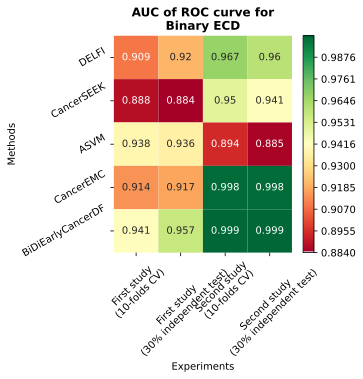

In [ ]:
plt.figure(figsize=(4,4))
color_map = cm.get_cmap('RdYlGn', 1000)
m = plt.cm.ScalarMappable(cmap=color_map)
m.set_clim(0.884, 0.999)
plt.colorbar(m, boundaries=np.linspace(0.884, 0.999, 1000))

heatmap = sb.heatmap(data, cmap='RdYlGn', cbar=False, annot=True, fmt='.3g', xticklabels=True, yticklabels=True, vmin=0.884, vmax=0.999) 
col=['First study\n(10-folds CV)','First study\n(30% independent test)','Second study\n(10-folds CV)',
     'Second study\n(30% independent test)']
heatmap.set_xticklabels(col, rotation=45) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30) 
heatmap.set_title("AUC of ROC curve for\nBinary ECD",fontweight='bold', fontsize=12)
plt.xlabel("Experiments")
plt.ylabel("Methods")
plt.savefig("AUCbHM.png", bbox_inches='tight', dpi=300)

In [ ]:
df = pd.read_csv('AUC-localize.csv')
data=x=df.iloc[0:6,0:5]
data.set_index("methods", inplace = True)
x

,First study\n (10-folds CV),First study\n (30% inde-pendent test data),Second study\n(10-folds CV),Second study\n(30% inde-pendent test data)
methods,,,,
DELFI,0.850,0.000,0.920,0.940
CancerSEEK,0.850,0.880,0.910,0.000
ASVM,0.791,0.791,0.906,0.907
CancerEMC,0.945,0.945,0.992,0.992
BiDiEarlyCancerDF,0.990,0.983,0.996,0.996


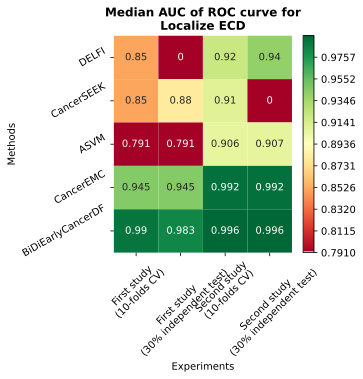

In [ ]:
plt.figure(figsize=(4,4))
color_map = cm.get_cmap('RdYlGn', 1000)
m = plt.cm.ScalarMappable(cmap=color_map)
m.set_clim(0.791, 0.996)
plt.colorbar(m, boundaries=np.linspace(0.791, 0.996, 1000))

heatmap = sb.heatmap(data, cmap='RdYlGn', cbar=False, annot=True, fmt='.3g', xticklabels=True, yticklabels=True, vmin=0.791, vmax=0.996) 
col=['First study\n(10-folds CV)','First study\n(30% independent test)','Second study\n(10-folds CV)',
     'Second study\n(30% independent test)']
heatmap.set_xticklabels(col, rotation=45) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30) 
heatmap.set_title("Median AUC of ROC curve for\nLocalize ECD",fontweight='bold', fontsize=12)
plt.xlabel("Experiments")
plt.ylabel("Methods")
plt.savefig("AUClHM.png", bbox_inches='tight', dpi=300)

In [ ]:
df = pd.read_csv('ACC-localize.csv')
data=x=df.iloc[0:6,0:5]
data.set_index("methods", inplace = True)
x

,First study\n (10-folds CV),First study\n (30% inde-pendent test data),Second study\n(10-folds CV),Second study\n(30% inde-pendent test data)
methods,,,,
DELFI,61.00,0.00,65.17,69.20
CancerSEEK,56.04,65.49,62.32,0.00
ASVM,81.50,0.00,68.33,66.56
CancerEMC,78.04,75.22,91.49,92.43
BiDiEarlyCancerDF,85.19,86.84,94.85,93.85


In [ ]:
x.iloc[4,2]=86.84
x.iloc[4,2]

86.84

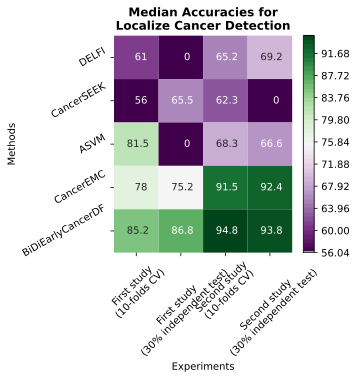

In [ ]:
plt.figure(figsize=(4,4))
color_map = cm.get_cmap('PRGn', 100)
m = plt.cm.ScalarMappable(cmap=color_map)
m.set_clim(56.04, 94.85)
plt.colorbar(m, boundaries=np.linspace(56.04, 94.85))
heatmap = sb.heatmap(data, cmap='PRGn', cbar=False, annot=True, fmt='5.3g', xticklabels=True, yticklabels=True, vmin=56.04 	, vmax=94.85) 
col=['First study\n(10-folds CV)','First study\n(30% independent test)','Second study\n(10-folds CV)',
     'Second study\n(30% independent test)']
heatmap.set_xticklabels(col, rotation=45) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30) 
heatmap.set_title("Median Accuracies for\nLocalize Cancer Detection",fontweight='bold', fontsize=12)
plt.xlabel("Experiments")
plt.ylabel("Methods")
plt.savefig("ACClHM.png", bbox_inches='tight', dpi=300)